In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset challenge 2 binar/Data Train.csv')

In [ ]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

# **PROSES EDA**

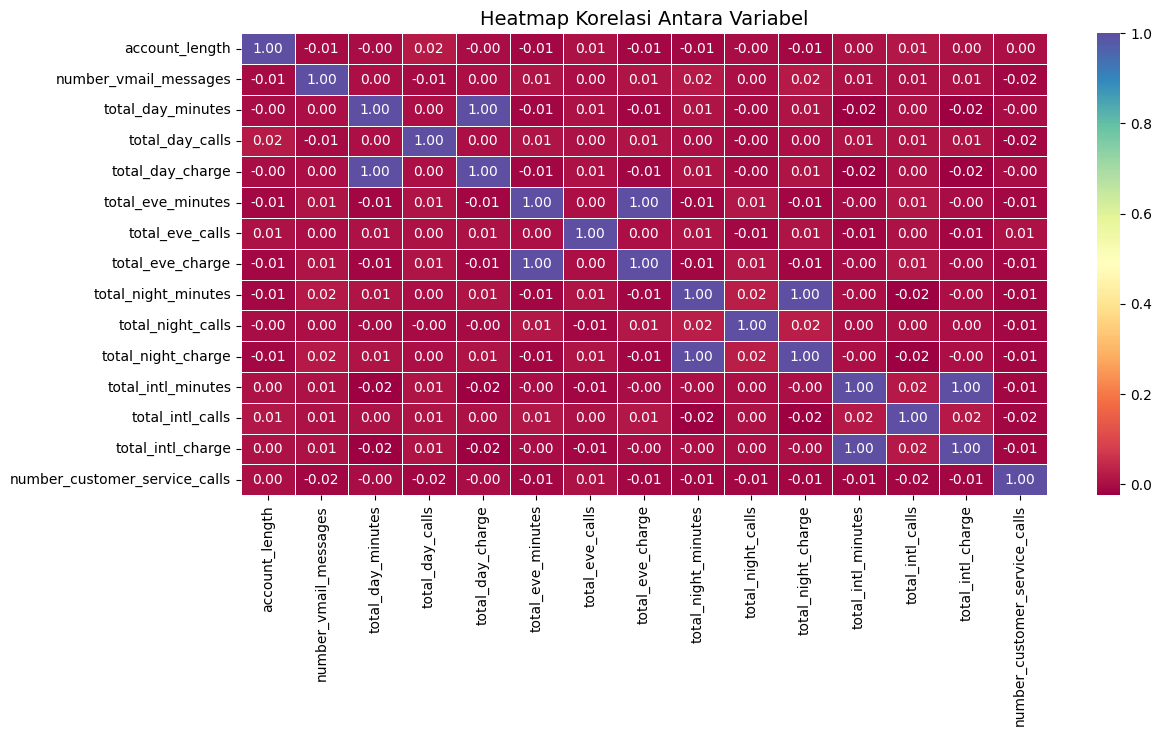

In [ ]:
plt.figure(figsize=(13, 6))
ax = sns.heatmap(df_train.corr(), cmap='Spectral', annot=True, fmt='.2f', linewidths=0.5)
ax.set_title('Heatmap Korelasi Antara Variabel', fontsize=14)
plt.show()

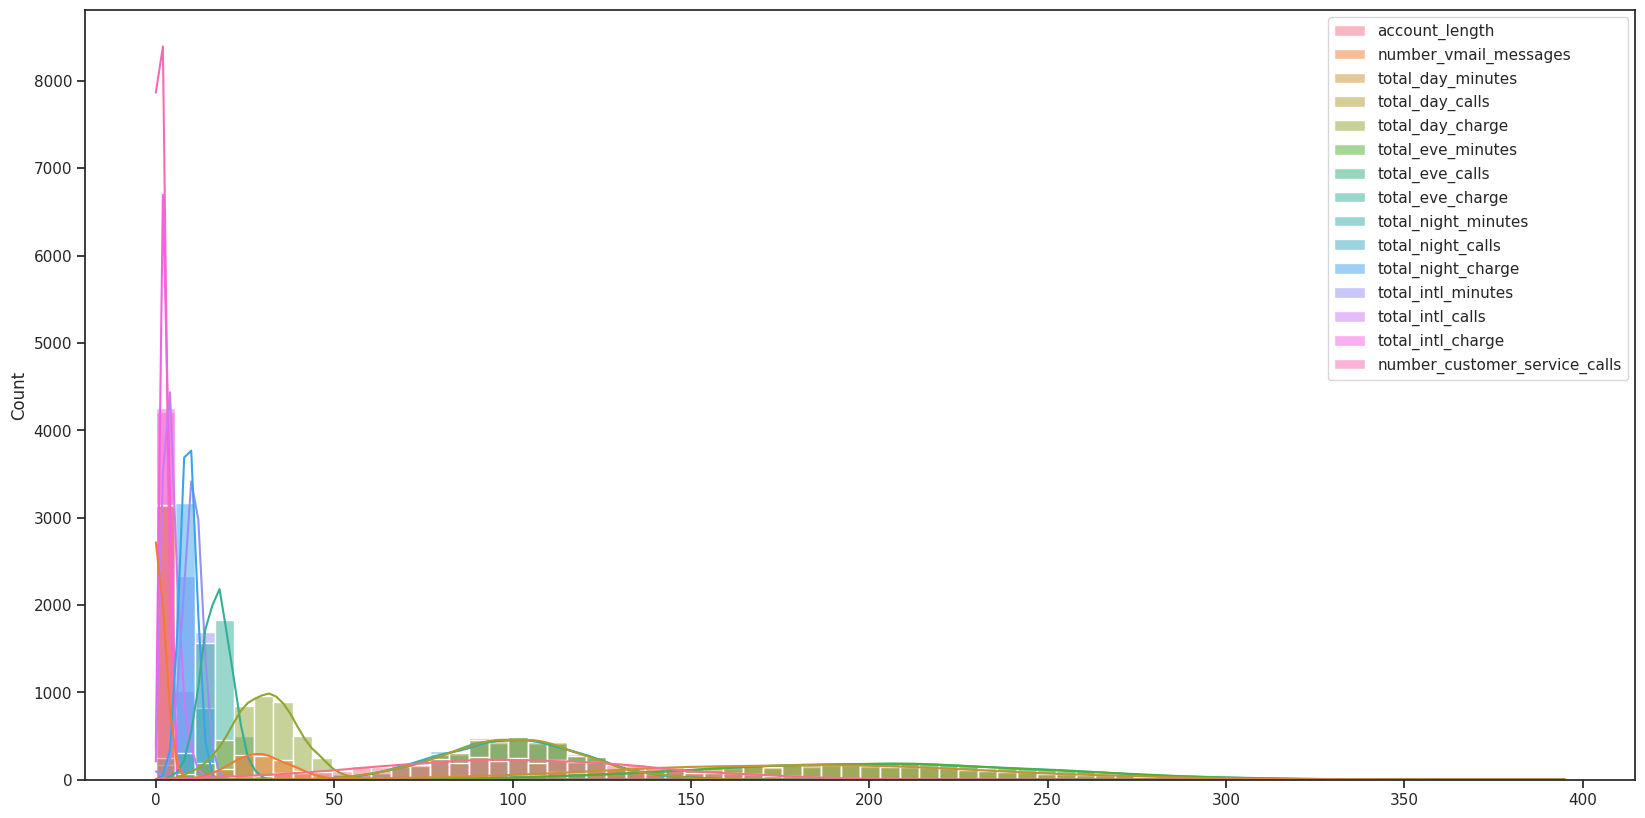

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style='ticks')
sns.histplot(data=df_train, kde=True)
plt.show()

In [ ]:
df_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [ ]:
df_train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
df_train['state'].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [ ]:
df_train['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
df_train['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
#melihat korelasi antara kolom numerik
print(df_train.corr())

                               account_length  number_vmail_messages  \
account_length                       1.000000              -0.006626   
number_vmail_messages               -0.006626               1.000000   
total_day_minutes                   -0.001612               0.002000   
total_day_calls                      0.023002              -0.006920   
total_day_charge                    -0.001613               0.001994   
total_eve_minutes                   -0.010326               0.010725   
total_eve_calls                      0.005535               0.003593   
total_eve_charge                    -0.010322               0.010736   
total_night_minutes                 -0.009916               0.018308   
total_night_calls                   -0.001846               0.001977   
total_night_charge                  -0.009942               0.018300   
total_intl_minutes                   0.004539               0.005220   
total_intl_calls                     0.013690               0.00

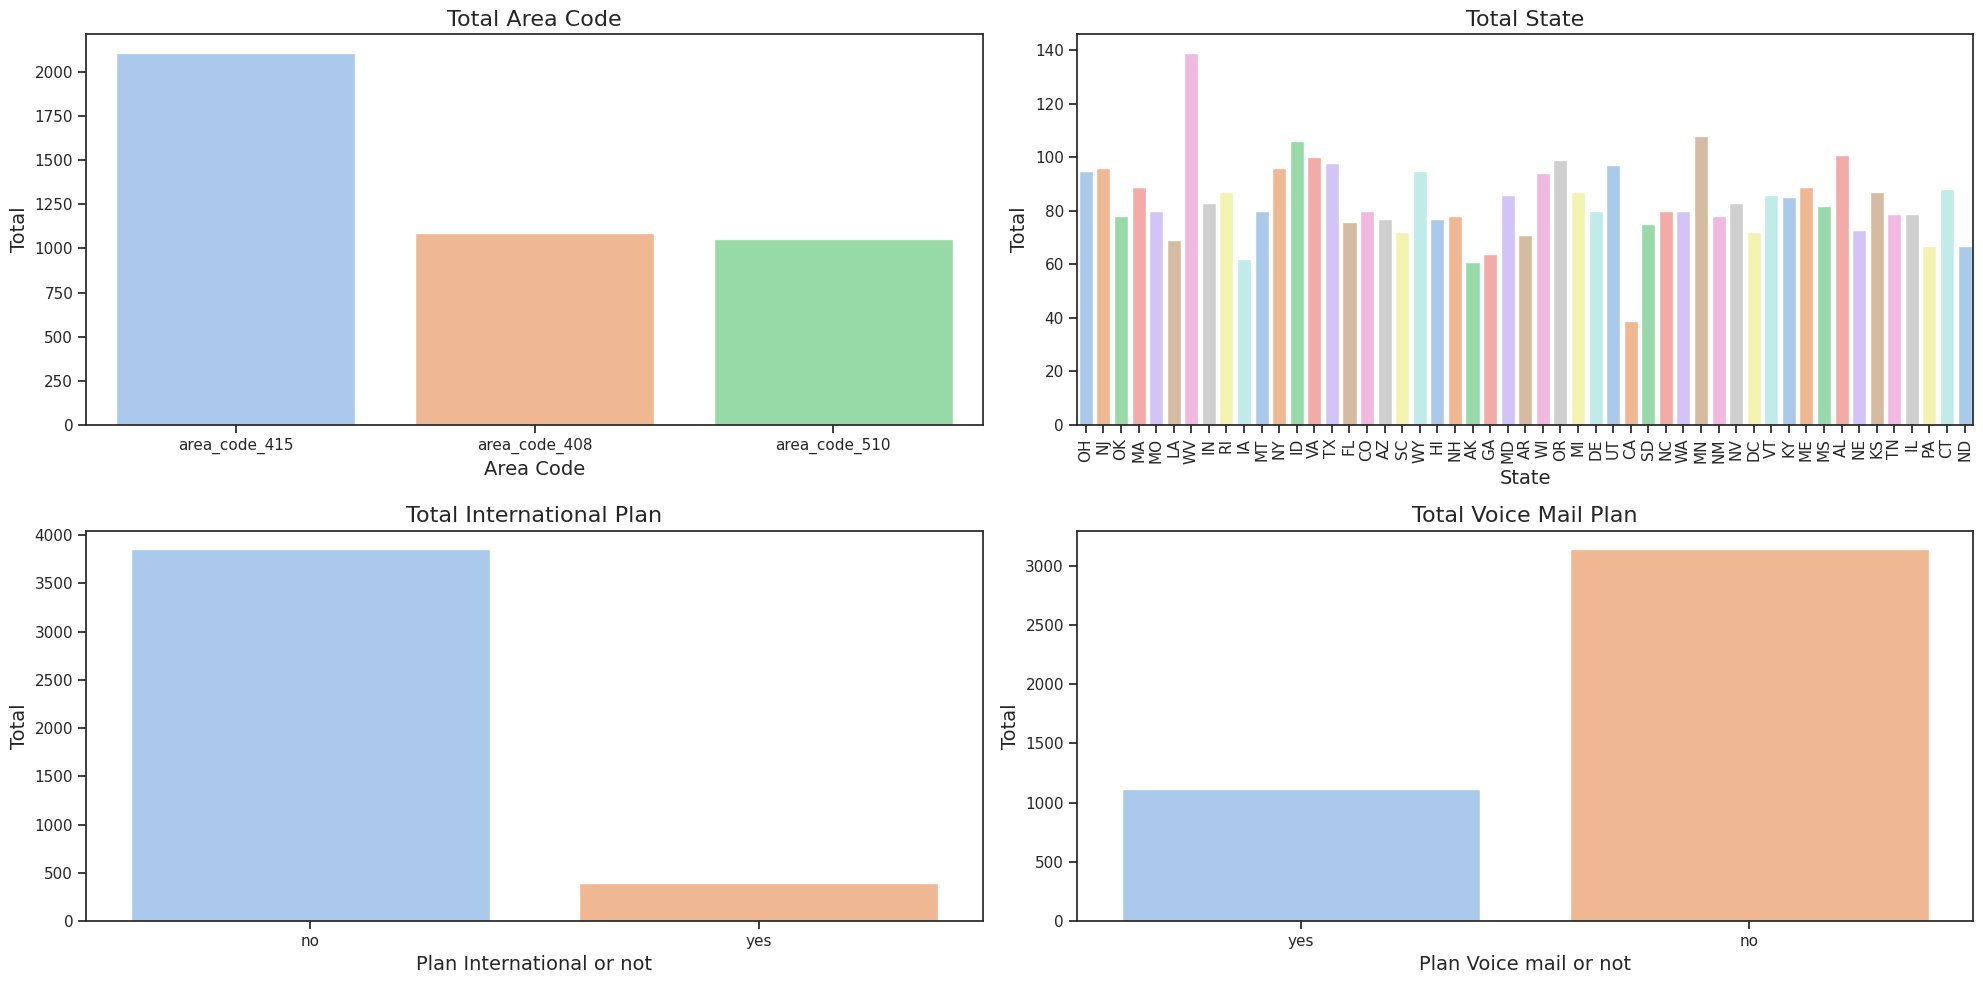

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='area_code', data=df_train, palette='pastel')
plt.title('Total Area Code', fontsize=16)
plt.xlabel('Area Code', fontsize=14)
plt.ylabel('Total', fontsize=14)

plt.subplot(2, 2, 2)
sns.countplot(x='state', data=df_train, palette='pastel')
plt.title('Total State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.countplot(x='international_plan', data=df_train, palette='pastel')
plt.title('Total International Plan', fontsize=16)
plt.xlabel('Plan International or not', fontsize=14)
plt.ylabel('Total', fontsize=14)

plt.subplot(2, 2, 4)
sns.countplot(x='voice_mail_plan', data=df_train, palette='pastel')
plt.title('Total Voice Mail Plan', fontsize=16)
plt.xlabel('Plan Voice mail or not', fontsize=14)
plt.ylabel('Total', fontsize=14)


plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'WV'),
  Text(1, 0, 'MN'),
  Text(2, 0, 'ID'),
  Text(3, 0, 'AL'),
  Text(4, 0, 'VA'),
  Text(5, 0, 'OR'),
  Text(6, 0, 'TX'),
  Text(7, 0, 'UT'),
  Text(8, 0, 'NY'),
  Text(9, 0, 'NJ'),
  Text(10, 0, 'WY'),
  Text(11, 0, 'OH'),
  Text(12, 0, 'WI'),
  Text(13, 0, 'MA'),
  Text(14, 0, 'ME'),
  Text(15, 0, 'CT'),
  Text(16, 0, 'RI'),
  Text(17, 0, 'MI'),
  Text(18, 0, 'KS'),
  Text(19, 0, 'MD'),
  Text(20, 0, 'VT'),
  Text(21, 0, 'KY'),
  Text(22, 0, 'NV'),
  Text(23, 0, 'IN'),
  Text(24, 0, 'MS'),
  Text(25, 0, 'WA'),
  Text(26, 0, 'NC'),
  Text(27, 0, 'MO'),
  Text(28, 0, 'DE'),
  Text(29, 0, 'CO'),
  Text(30, 0, 'MT'),
  Text(31, 0, 'IL'),
  Text(32, 0, 'TN'),
  Text(33, 0, 'NM'),
  Text(34, 0, 'OK'),
  Text(35, 0, 'NH'),
  Text(36, 0, 'HI'),
  T

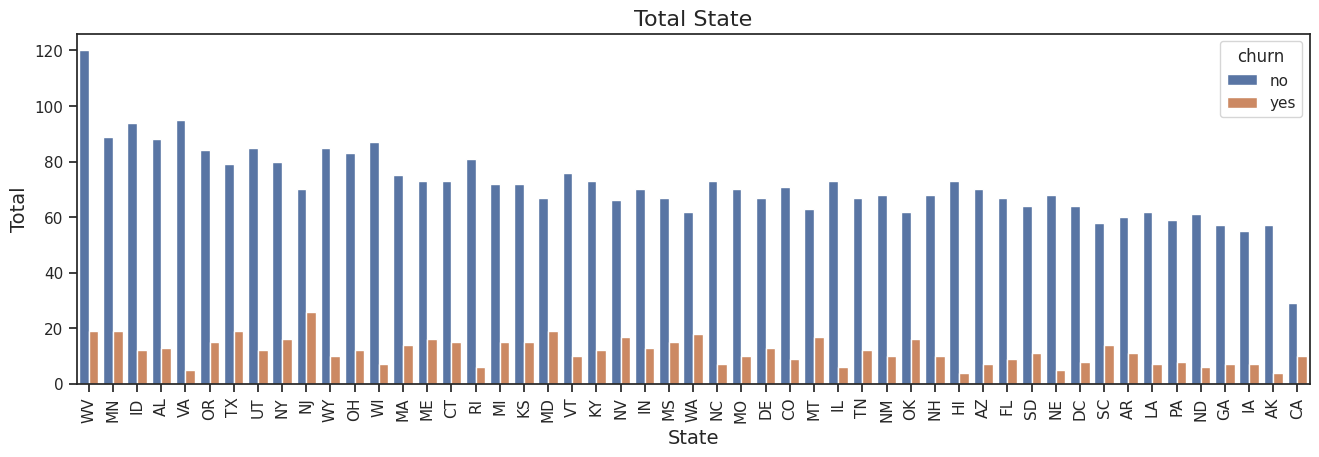

In [ ]:
plt.figure(figsize=(35, 10))
plt.subplot(2, 2, 2)
sns.countplot(x='state', data=df_train, hue='churn', order=df_train['state'].value_counts().index)
plt.title('Total State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'area_code_415'),
  Text(1, 0, 'area_code_408'),
  Text(2, 0, 'area_code_510')])

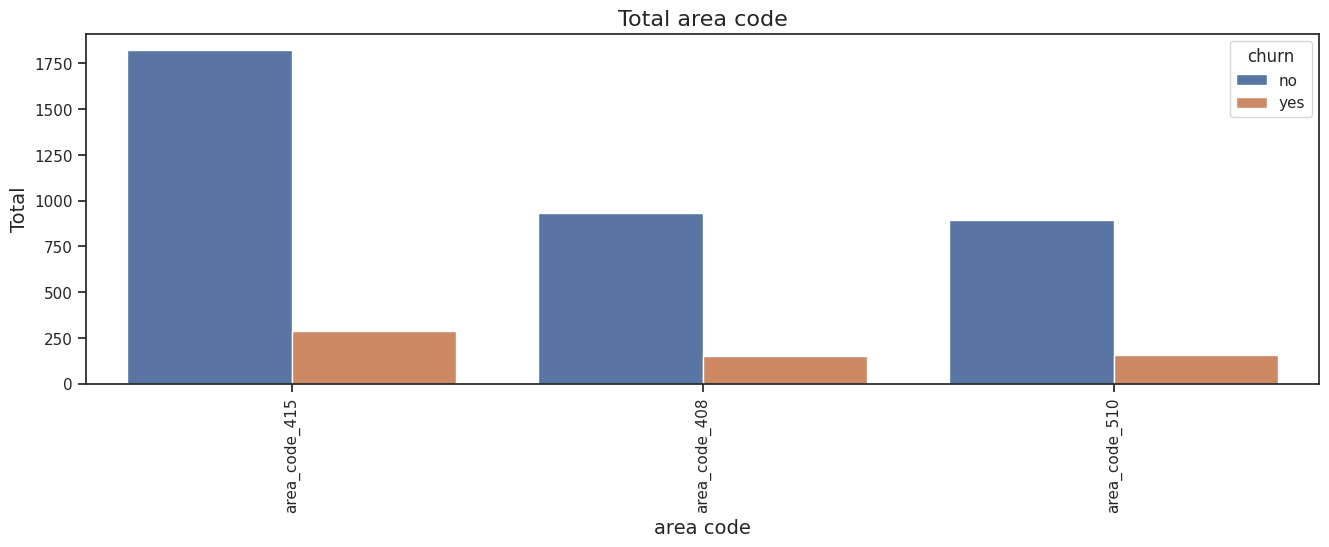

In [ ]:
plt.figure(figsize=(35, 10))
plt.subplot(2, 2, 2)
sns.countplot(x='area_code', data=df_train, hue='churn', order=df_train['area_code'].value_counts().index)
plt.title('Total area code', fontsize=16)
plt.xlabel('area code', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=90)

Text(0, 0.5, 'Total')

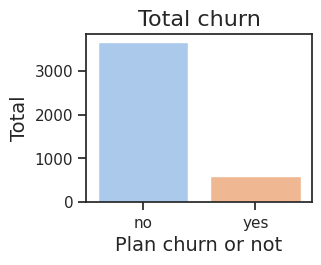

In [ ]:
plt.subplot(2, 2, 3)
sns.countplot(x='churn', data=df_train, palette='pastel')
plt.title('Total churn', fontsize=16)
plt.xlabel('Plan churn or not', fontsize=14)
plt.ylabel('Total', fontsize=14)

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# **PROSES PREPROSESING**

In [ ]:
kolom_numerik = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

In [ ]:
scaler = MinMaxScaler()
df_train[kolom_numerik] = scaler.fit_transform(df_train[kolom_numerik])

In [ ]:
EN = LabelEncoder()

df_train['state'] = EN.fit_transform(df_train['state'])

df_train['area_code'] = EN.fit_transform(df_train['area_code'])

df_train['voice_mail_plan'] = EN.fit_transform(df_train['voice_mail_plan'])

df_train['international_plan'] = EN.fit_transform(df_train['international_plan'])

df_train['churn'] = EN.fit_transform(df_train['churn'])

In [ ]:
X = df_train.drop(['churn'], axis = 1)
y = df_train['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

# **TIDAK MENGGUNAKAN SMOTE DAN HYPERPARAMETER**

# **MODEL TREE**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
tree_model = DecisionTreeClassifier() 
 
#Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.918


In [ ]:
print('Training Accuracy :', tree_model.score(X_train, y_train))
print('Testing Accuracy :', tree_model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9176470588235294


In [ ]:
print('Mean f1 scores')
print('tree model :',cross_val_score(tree_model,X_train, y_train,cv=10,scoring='f1').mean())

Mean f1 scores
tree model : 0.6894816432952653


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       735
           1       0.67      0.77      0.72       115

    accuracy                           0.92       850
   macro avg       0.82      0.85      0.83       850
weighted avg       0.92      0.92      0.92       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[692  43]
 [ 27  88]]


# **MODEL SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.865


In [ ]:
print('Training Accuracy :', svm_model.score(X_train, y_train))
print('Testing Accuracy :', svm_model.score(X_test, y_test))

Training Accuracy : 0.8579411764705882
Testing Accuracy : 0.8647058823529412


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       735
           1       0.00      0.00      0.00       115

    accuracy                           0.86       850
   macro avg       0.43      0.50      0.46       850
weighted avg       0.75      0.86      0.80       850



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[735   0]
 [115   0]]


# **RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier()
rf_history = rf_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
 
y_pred = rf_history.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.966


In [ ]:
print('Training Accuracy :', rf_history.score(X_train, y_train))
print('Testing Accuracy :', rf_history.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9658823529411765


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       735
           1       0.99      0.76      0.86       115

    accuracy                           0.97       850
   macro avg       0.98      0.88      0.92       850
weighted avg       0.97      0.97      0.96       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[734   1]
 [ 28  87]]


# **XGBOOST MODEL**

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9670588235294117


In [ ]:
print('Training Accuracy :', rf_history.score(X_train, y_train))
print('Testing Accuracy :', rf_history.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9658823529411765


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       735
           1       0.98      0.77      0.86       115

    accuracy                           0.97       850
   macro avg       0.97      0.89      0.92       850
weighted avg       0.97      0.97      0.97       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[733   2]
 [ 26  89]]


# **MENGGUNAKAN SMOTE DAN HYPERPARAMETER**

# **MODEL POHON KEPUTUSAN**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [ ]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
#tree_model = tree_model.fit(X_train_resh, y_train_resh)

In [ ]:
random_search_DTC = GridSearchCV(tree_model, param_grid, cv=5)

In [ ]:
random_search_DTC.fit(X_train_resh, y_train_resh)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [ ]:
print('Best hyperparameters: ', random_search_DTC.best_params_)
print('Best accuracy score: ', random_search_DTC.best_score_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1}
Best accuracy score:  0.840588305326143


In [ ]:
from sklearn.metrics import accuracy_score
 
y_pred = random_search_DTC.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.913


In [ ]:
print('Training Accuracy :', random_search_DTC.score(X_train_resh, y_train_resh))
print('Testing Accuracy :', random_search_DTC.score(X_test, y_test))

Training Accuracy : 0.8558450462804251
Testing Accuracy : 0.9129411764705883


In [ ]:
print('Mean f1 scores')
print('tree model :',cross_val_score(random_search_DTC,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores
tree model : 0.8235535065193693


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       735
           1       0.65      0.77      0.70       115

    accuracy                           0.91       850
   macro avg       0.81      0.85      0.83       850
weighted avg       0.92      0.91      0.92       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[688  47]
 [ 27  88]]


# **MODEL SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
#svm_model = svm_model.fit(X_train_resh, y_train_resh)

In [ ]:
param_grid2 = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'rbf']}

In [ ]:
random_search_SVM = GridSearchCV(svm_model, param_grid2, cv=5)

In [ ]:
random_search_SVM.fit(X_train_resh, y_train_resh)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']})

In [ ]:
print('Best hyperparameters: ', random_search_SVM.best_params_)
print('Best accuracy score: ', random_search_SVM.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy score:  0.9139552384689893


In [ ]:
y_pred = random_search_SVM.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.813


In [ ]:
print('Training Accuracy :', random_search_SVM.score(X_train_resh, y_train_resh))
print('Testing Accuracy :', random_search_SVM.score(X_test, y_test))

Training Accuracy : 0.9928008227631128
Testing Accuracy : 0.8129411764705883


In [ ]:
print('Mean f1 scores')
print('tree model :',cross_val_score(random_search_SVM,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       735
           1       0.32      0.34      0.33       115

    accuracy                           0.81       850
   macro avg       0.61      0.61      0.61       850
weighted avg       0.82      0.81      0.82       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[652  83]
 [ 76  39]]


# **MODEL Random Forest**

In [ ]:
rf_model = RandomForestClassifier()
#rf_history = rf_model.fit(X_train_resh, y_train_resh)

In [ ]:
param_grid3 = {'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [ ]:
grid_search_RF = GridSearchCV(estimator = rf_model, param_grid = param_grid3, cv = 3, n_jobs = -1)

In [ ]:
rf_history = grid_search_RF.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
 
y_pred = rf_history.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.941


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       735
           1       0.97      0.58      0.73       115

    accuracy                           0.94       850
   macro avg       0.95      0.79      0.85       850
weighted avg       0.94      0.94      0.93       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[733   2]
 [ 48  67]]


# **XGBOOST KLASIFIKASI**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=10, cv=5, verbose=3, n_jobs=-1)

In [ ]:
random_search.fit(X_train_resh, y_train_resh)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   verbose=3)

In [ ]:
print(random_search.best_params_)

{'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
xgb_clf_best = xgb.XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8)

In [ ]:
xgb_clf_best.fit(X_train_resh, y_train_resh)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_clf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9623529411764706


In [ ]:
print('Training Accuracy :', xgb_clf_best.score(X_train_resh, y_train_resh))
print('Testing Accuracy :', xgb_clf_best.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9623529411764706


In [ ]:
print('Mean f1 scores')
print('XGBoost Model :',cross_val_score(xgb_clf_best,X_train_resh,y_train_resh,cv=10,scoring='f1').mean())

Mean f1 scores
XGBoost Model : 0.9670129455454524


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       735
           1       0.93      0.78      0.85       115

    accuracy                           0.96       850
   macro avg       0.95      0.89      0.91       850
weighted avg       0.96      0.96      0.96       850



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[728   7]
 [ 25  90]]


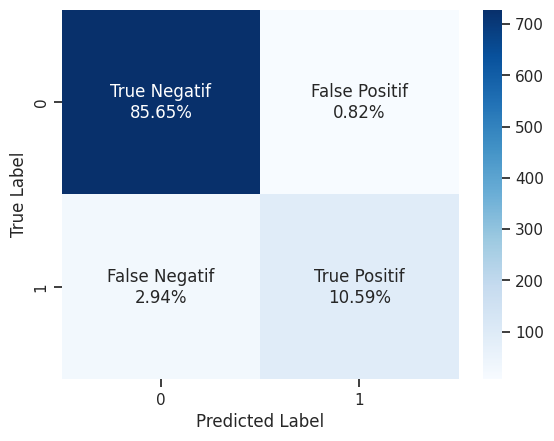

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# set label untuk sumbu x dan y
labels = ['True Negatif','False Positif','False Negatif','True Positif']

# reshape confusion matrix menjadi 1 dimensi
cm_1d = cm.ravel()

# hitung persentase setiap label
percentages = ['{:.2f}%'.format(value) for value in cm_1d/np.sum(cm_1d)*100]

# gabungkan label dengan persentase
labels = [f'{v1}\n{v2}' for v1, v2 in zip(labels, percentages)]
labels = np.asarray(labels).reshape(2,2)

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **perbandingan hasil model akurasi**

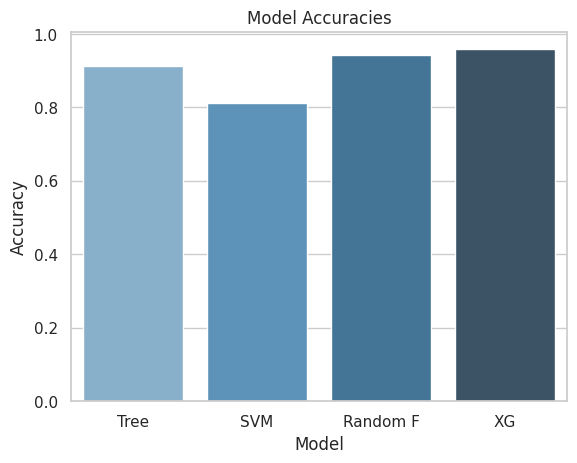

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data hasil akurasi model
model_names = ['Tree', 'SVM', 'Random F', 'XG']
accuracies = [0.913, 0.813, 0.941, 0.958]

# Membuat dataframe dari data hasil akurasi model
df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Membuat bar plot menggunakan seaborn
sns.set_style("whitegrid")
sns.barplot(x="Model", y="Accuracy", data=df, palette="Blues_d")

# Menambahkan label dan judul plot
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")

# Menampilkan plot
plt.show()

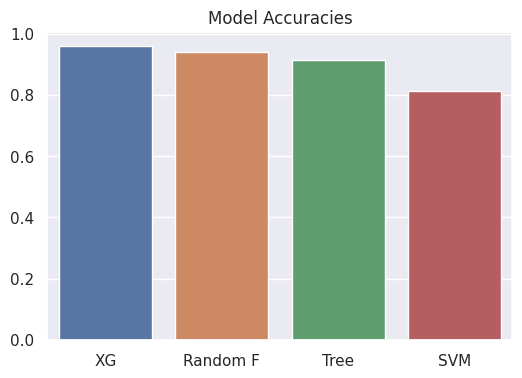

In [ ]:
x = ['XG', 'Random F', 'Tree', 'SVM']
y = [0.958, 0.941, 0.913, 0.813]

# membuat bar chart menggunakan seaborn
sns.set(style='darkgrid')
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=x, y=y)
ax.set_title('Model Accuracies')

# menampilkan plot
plt.show()

# **memprediksi model dengan dataset yang tersedia**

In [ ]:
df_tes = pd.read_csv('/content/drive/MyDrive/dataset challenge 2 binar/Data Test.csv')

In [ ]:
df_tes.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_tes.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
df_tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
df_tes[kolom_numerik] = scaler.fit_transform(df_tes[kolom_numerik])

In [ ]:
df_tes['state'] = EN.fit_transform(df_tes['state'])

df_tes['area_code'] = EN.fit_transform(df_tes['area_code'])

df_tes['voice_mail_plan'] = EN.fit_transform(df_tes['voice_mail_plan'])

df_tes['international_plan'] = EN.fit_transform(df_tes['international_plan'])

In [ ]:
df_tes.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,2,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,3,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,4,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,5,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000


In [ ]:
test_data = df_tes.copy()

In [ ]:
testing = test_data.drop(['id'], axis=1)

In [ ]:
testing.shape

(750, 19)

# **MEMILIH PREDIKSI DENGAN MODEL YANG TERBAIK**

In [ ]:
Pred_XG_Tes_data = xgb_clf_best.predict(testing)

In [ ]:
output_RF = pd.DataFrame({'id_customer': df_tes.id, 'State': df_tes.state, 'churn': Pred_XG_Tes_data })
output_RF.to_csv('result.RF.csv', index=False)

In [ ]:
df_pred = pd.read_csv('/content/result.RF.csv')

In [ ]:
df_pred

,id_customer,State,churn
0,1,16,1
1,2,1,0
2,3,12,1
3,4,46,1
4,5,29,1
...,...,...,...
745,746,10,0
746,747,47,1
747,748,49,1
748,749,7,1


Text(0, 0.5, 'Total')

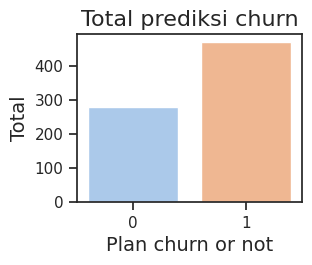

In [ ]:
plt.subplot(2, 2, 3)
sns.countplot(x='churn', data=df_pred, palette='pastel')
plt.title('Total prediksi churn', fontsize=16)
plt.xlabel('Plan churn or not', fontsize=14)
plt.ylabel('Total', fontsize=14)